In [ ]:
# Importing pandas
import pandas as pd

In [ ]:
# Reading the dataset
df=pd.read_csv(r"C:\Users\Admin\Downloads\Report_of_Connection_Events_all_without_classification.csv",low_memory=False)

In [ ]:
# Printing the dataset
print(df)

          First Packet Last Packet Action Reason    Initiator IP  \
0     11/23/2021 13:40         NaN  Allow    NaN      10.41.1.12   
1     11/23/2021 13:40         NaN  Allow    NaN     10.41.0.145   
2     11/23/2021 13:40         NaN  Allow    NaN       10.41.1.8   
3     11/23/2021 13:40         NaN  Allow    NaN     10.41.0.204   
4     11/23/2021 13:40         NaN  Allow    NaN     10.41.0.208   
...                ...         ...    ...    ...             ...   
8276  11/23/2021 12:40         NaN  Allow    NaN     10.41.0.193   
8277  11/23/2021 12:40         NaN  Block    NaN  183.211.186.29   
8278  11/23/2021 12:40         NaN  Allow    NaN     10.41.0.193   
8279  11/23/2021 12:40         NaN  Block    NaN   111.9.169.224   
8280  11/23/2021 12:40         NaN  Allow    NaN     10.41.0.193   

     Initiator Continent Initiator Country  Initiator User     Responder IP  \
0                    NaN               NaN             0.0          8.8.8.8   
1                    NaN 

In [ ]:
df['Action'] =df.Action.map({'Allow':0, 'Block':1, 'Block with reset':1})
#1 for malware and 0 for benign

In [ ]:
# Counting the number of malicious and benign rows
df['Action'].value_counts()

0    7846
1     435
Name: Action, dtype: int64

In [ ]:
df['IngressInterface'] =df.IngressInterface.map({'inside':0, 'outside':1})

In [ ]:
df['IngressInterface'].value_counts()

0    7989
1     292
Name: IngressInterface, dtype: int64

In [ ]:
# Printing the column names
feature_names = df.columns
feature_names

Index(['First Packet', 'Last Packet', 'Action', 'Reason', 'Initiator IP',
       'Initiator Continent', 'Initiator Country', 'Initiator User',
       'Responder IP', 'Responder Continent',
       ...
       'QoS-Dropped Responder Packets', 'Initiator Bytes', 'Responder Bytes',
       'QoS-Dropped Initiator Bytes', 'QoS-Dropped Responder Bytes',
       'Source IP Dynamic Attribute', 'Destination IP Dynamic Attribute',
       'Unnamed: 98', 'Unnamed: 99', 'Source Port / ICMP Type'],
      dtype='object', length=101)

In [ ]:
# True represents no value, Flase represents a value
import seaborn as sns
df.isnull()

,First Packet,Last Packet,Action,Reason,Initiator IP,Initiator Continent,Initiator Country,Initiator User,Responder IP,Responder Continent,...,QoS-Dropped Responder Packets,Initiator Bytes,Responder Bytes,QoS-Dropped Initiator Bytes,QoS-Dropped Responder Bytes,Source IP Dynamic Attribute,Destination IP Dynamic Attribute,Unnamed: 98,Unnamed: 99,Source Port / ICMP Type
0,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,True,True,True,False
2,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,False,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,False,True,False,True,False,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,False
8277,False,True,False,True,False,False,False,True,False,True,...,False,False,False,False,False,True,True,True,True,False
8278,False,True,False,True,False,True,True,True,False,False,...,False,False,False,False,False,True,True,True,True,False
8279,False,True,False,True,False,False,False,True,False,True,...,False,False,False,False,False,True,True,True,True,False


In [ ]:
# Filling the empty column with the most frequent value
df = df.fillna(df.mode().iloc[0])

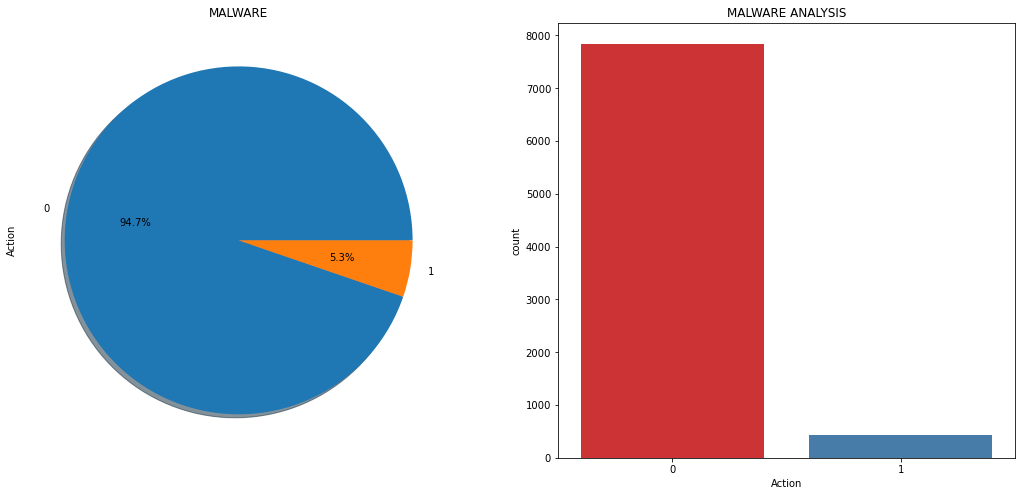

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['Action'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('MALWARE')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Action", data=df, palette="Set1")
ax[1].set_title("MALWARE ANALYSIS")

plt.show()

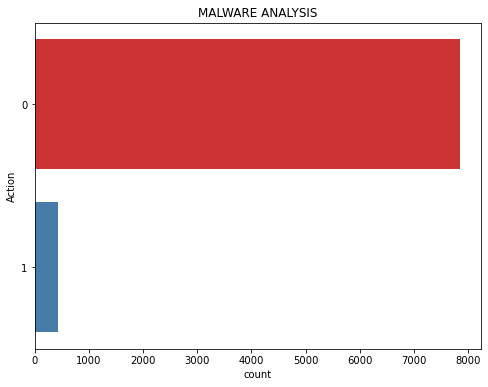

In [ ]:
# Plotting the bars horizontally
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="Action", data=df, palette="Set1")
ax.set_title("MALWARE ANALYSIS")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


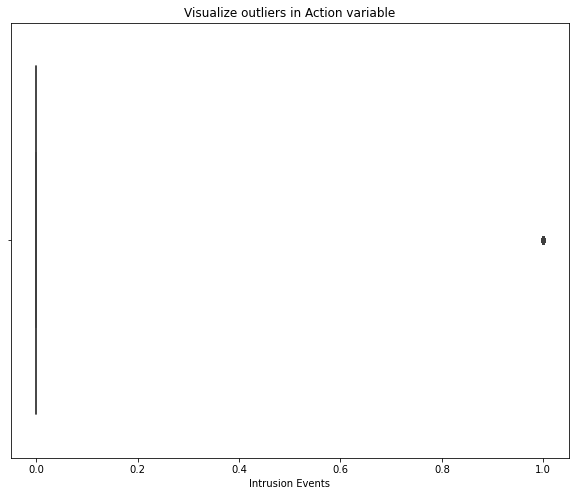

In [ ]:
# Checking for the outliers
f, ax = plt.subplots(figsize=(10,8))
x = df['Intrusion Events']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Action variable")
plt.show()

In [ ]:
cols = ['First Packet', 'Last Packet','Reason', 'Initiator User','Initiator Continent',
       'Responder IP', 'Responder Continent', 'Responder Country',
       'Original Client IP', 'Original Client Continent',
       'Original Client Country', 'Security Intelligence Category','Client',
       'Ingress Security Zone', 'Egress Security Zone',
        'Destination Port / ICMP Code', 'SSL Status',
       'SSL Flow Error', 'SSL Actual Action', 'SSL Expected Action',
       'SSL Certificate Status', 'SSL Version', 'SSL Cipher Suite',
       'SSL Policy', 'SSL Rule', 'SSL Session ID', 'SSL Ticket ID',
       'SSL Flow Flags', 'SSL Flow Messages',
       'Application Protocol Category', 'Application Protocol Tag',
       'Client Version', 'Client Category', 'Client Tag',
       'Web Application Category', 'Web Application Tag', 'Application Risk',
       'Business Relevance',  'URL Reputation',
       'DNS Query', 'DNS Response', 'DNS Record Type', 'DNS TTL',
       'DNS Sinkhole Name', 'HTTP Response Code', 'VLAN ID', 'Referenced Host',
       'User Agent', 'HTTP Referrer', 'IOC', 'Intrusion Events', 'Files',
       'Access Control Policy', 'Access Control Rule','Source Port / ICMP Type',
       'Network Analysis Policy', 'Prefilter Policy', 'Tunnel/Prefilter Rule',
       'QoS Policy', 'QoS Rule', 'Source SGT', 'Destination SGT','Web Application',
       'Endpoint Profile', 'Endpoint Location', 'Device',
       'Egress Interface', 'Ingress Virtual Router', 'Egress Virtual Router',
       'QoS-Applied Interface', 'Source Device', 'TCP Flags',
       'Netflow Source Autonomous System',
       'Netflow Destination Autonomous System', 'Netflow SNMP Input',
       'Netflow SNMP Output', 'Netflow Source TOS', 'Netflow Destination TOS',
       'Netflow Source Prefix', 'Netflow Destination Prefix', 'NetBIOS Domain',
        'Responder Packets',
       'QoS-Dropped Initiator Packets', 'QoS-Dropped Responder Packets',
        'Responder Bytes', 'QoS-Dropped Initiator Bytes',
       'QoS-Dropped Responder Bytes', 'Source IP Dynamic Attribute',
       'Destination IP Dynamic Attribute' ]

# Dropping the unwanted columns
df2 = df.drop(cols, axis=1)

In [ ]:
# Printing the required columns
print(df2)

      Action    Initiator IP Initiator Country  Source Port   \
0          0      10.41.1.12               USA         38367   
1          0     10.41.0.145               USA             8   
2          0       10.41.1.8               USA         49178   
3          0     10.41.0.204               USA         56176   
4          0     10.41.0.208               USA         37584   
...      ...             ...               ...           ...   
8276       0     10.41.0.193               USA          2720   
8277       1  183.211.186.29               CHN          4771   
8278       0     10.41.0.193               USA          2721   
8279       1   111.9.169.224               CHN         53189   
8280       0     10.41.0.193               USA          2722   

     Application Protocol                                URL  \
0                   HTTPS  https://central.attendance.gov.in   
1                    ICMP  https://central.attendance.gov.in   
2                   HTTPS  https://cent

In [ ]:
#Printing the dimensions of the data
df2.shape

(8281, 12)

In [ ]:
# First five rows of the dataset
df2.head()

,Action,Initiator IP,Initiator Country,Source Port,Application Protocol,URL,URL Category,IngressInterface,Initiator Packets,Initiator Bytes,Unnamed: 98,Unnamed: 99
0,0,10.41.1.12,USA,38367,HTTPS,https://central.attendance.gov.in,Government and Law,0,1,74,NaN,NaN
1,0,10.41.0.145,USA,8,ICMP,https://central.attendance.gov.in,Government and Law,0,1,98,NaN,NaN
2,0,10.41.1.8,USA,49178,HTTPS,https://central.attendance.gov.in,Government and Law,0,1,74,NaN,NaN
3,0,10.41.0.204,USA,56176,SSL,https://supl.google.com,Search Engines and Portals,0,3,291,NaN,NaN
4,0,10.41.0.208,USA,37584,NTP,https://central.attendance.gov.in,Government and Law,0,1,90,NaN,NaN


In [ ]:
# Class Distribution
# Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.
print(df2.groupby('Action').size())

Action
0    7846
1     435
dtype: int64


In [ ]:
df2['Action'].value_counts()

0    7846
1     435
Name: Action, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


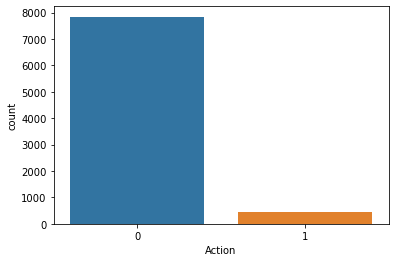

In [ ]:
# Visualizing the malware and normal data
sns.countplot(df["Action"])
plt.show()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8281 entries, 0 to 8280
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Action                8281 non-null   int64  
 1   Initiator IP          8281 non-null   object 
 2   Initiator Country     8281 non-null   object 
 3   Source Port           8281 non-null   int64  
 4   Application Protocol  8281 non-null   object 
 5   URL                   8281 non-null   object 
 6   URL Category          8281 non-null   object 
 7   IngressInterface      8281 non-null   int64  
 8   Initiator Packets     8281 non-null   int64  
 9   Initiator Bytes       8281 non-null   int64  
 10  Unnamed: 98           0 non-null      float64
 11  Unnamed: 99           0 non-null      float64
dtypes: float64(2), int64(5), object(5)
memory usage: 776.5+ KB


In [ ]:
# Printing the datatype of each column
df2.dtypes

Action                    int64
Initiator IP             object
Initiator Country        object
Source Port               int64
Application Protocol     object
URL                      object
URL Category             object
IngressInterface          int64
Initiator Packets         int64
Initiator Bytes           int64
Unnamed: 98             float64
Unnamed: 99             float64
dtype: object

In [ ]:
# Converting string to float

df2["Initiator IP"] = pd.to_numeric(df2["Initiator IP"].str.replace('.', ''))

df2.dtypes

C:\Users\Admin\AppData\Local\Temp/ipykernel_6592/3375076294.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2["Initiator IP"] = pd.to_numeric(df2["Initiator IP"].str.replace('.', ''))


Action                    int64
Initiator IP              int64
Initiator Country        object
Source Port               int64
Application Protocol     object
URL                      object
URL Category             object
IngressInterface          int64
Initiator Packets         int64
Initiator Bytes           int64
Unnamed: 98             float64
Unnamed: 99             float64
dtype: object

In [ ]:
df2.columns

Index(['Action', 'Initiator IP', 'Initiator Country', 'Source Port ',
       'Application Protocol', 'URL', 'URL Category', 'IngressInterface',
       'Initiator Packets', 'Initiator Bytes', 'Unnamed: 98', 'Unnamed: 99'],
      dtype='object')

In [ ]:
# Visualizing in the form of array
import numpy as np
feature_df=df2[['Initiator IP','Source Port ','IngressInterface','Initiator Packets','Initiator Bytes']]
X=np.asarray(feature_df)
y=np.asarray(df2['Action'])
X[0:5]

array([[ 1041112,    38367,        0,        1,       74],
       [10410145,        8,        0,        1,       98],
       [  104118,    49178,        0,        1,       74],
       [10410204,    56176,        0,        3,      291],
       [10410208,    37584,        0,        1,       90]], dtype=int64)

In [ ]:
# Splitting the dataset into tarining and testing set
from sklearn.model_selection import train_test_split
from sklearn import *
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

X_train.shape

y_train.shape

X_test.shape

y_test.shape

(1657,)

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10,random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9794809897404949


In [ ]:
# Showing the classification report of our model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1579
           1       0.81      0.73      0.77        78

    accuracy                           0.98      1657
   macro avg       0.90      0.86      0.88      1657
weighted avg       0.98      0.98      0.98      1657



In [ ]:
# Print the Confusion Matrix and slice it into pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[1566   13]
 [  21   57]]


<AxesSubplot:>

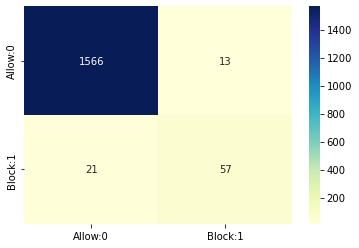

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Allow:0', 'Block:1'],
                                 index=['Allow:0','Block:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from tkinter import *
root = Tk()
root.title("THREAT DETECTION")
root.geometry('500x400')

''

In [ ]:
# Labelling the input parameters
Label(root, text="Initiator IP", font="Times 15").grid(row=0, column=0, padx=50, pady=10)
Label(root, text="Source Port ", font="Times 15").grid(row=1, column=0, padx=50, pady=10)
Label(root, text="IngressInterface", font="Times 15").grid(row=2, column=0, padx=50, pady=10)
Label(root, text="Initiator Packets", font="Times 15").grid(row=3, column=0, padx=50, pady=10)
Label(root, text="Initiator Bytes", font="Times 15").grid(row=4, column=0, padx=50, pady=10)
Label(root, text="predict", font="Times 20").grid(row=5, column=0, pady=10)

In [ ]:
# Giving access to enter the input
textbox = Text(root, height=3, width=20, )
textbox.grid(row=5, column=1)

input_text = StringVar()
input_text1 = StringVar()
input_text2 = StringVar()
input_text3 = StringVar()
input_text4 = StringVar()
result = StringVar()

e1 = Entry(root, font=1, textvariable=input_text)
e1.grid(row=0, column=1)
e2 = Entry(root, font=1, textvariable=input_text1)
e2.grid(row=1, column=1)
e3 = Entry(root, font=1, textvariable=input_text2)
e3.grid(row=2, column=1)
e4 = Entry(root, font=1, textvariable=input_text3)
e4.grid(row=3, column=1)
e5 = Entry(root, font=1, textvariable=input_text4)
e5.grid(row=4, column=1)



In [ ]:
def entryClear():
    input_text.set("")
    input_text1.set("")
    input_text2.set("")
    input_text3.set("")
    input_text4.set("")
    result.set("")
    textbox.delete(1.0, END)

In [ ]:
def getpredict():
    lst = [float(e1.get()),float(e2.get()),float(e3.get()),float(e4.get()),float(e5.get())]
    eg = np.array(lst)
    eg = eg.reshape(1, -1)


    model = RandomForestClassifier(random_state=10)
    model.fit(X_train,y_train)

    predict= model.predict(eg)
    textbox.insert(END, predict)


Button(root, text='Clear', font=10, width=8, bg="#9B0000", fg="white", command=entryClear).grid(row=6, column=0,
                                                                                                pady=10)
Button(root, text='predict', font=10, width=8, bg="#39FD03", fg="white", command=getpredict).grid(row=6, column=1,
                                                                                                  pady=10)

root.mainloop()